# eda026_rgnss by rtklibの確認

In [1]:
import os
import pandas as pd
import numpy as np
import ipynb_path
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
import seaborn as sns
import plotly
import plotly.express as px
%matplotlib inline
pd.set_option('display.max_rows', 200)
from math import * 
import warnings
warnings.simplefilter('ignore')

In [2]:
def get_nb_name():
    nb_path = ipynb_path.get()
    nb_name = nb_path.rsplit('/',1)[1].replace('.ipynb','')
    return nb_name

In [3]:
def visualize_trafic(df, center, zoom=9):
    fig = px.scatter_mapbox(df,
                            
                            # Here, plotly gets, (x,y) coordinates
                            lat="latDeg",
                            lon="lngDeg",
                            
                            #Here, plotly detects color of series
                            color="phoneName",
                            labels="phoneName",
                            
                            zoom=zoom,
                            center=center,
                            height=1000,
                            width=2000)
    fig.update_layout(mapbox_style='stamen-terrain')
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
    fig.update_layout(title_text="GPS trafic")
    fig.show()

In [4]:
def visualize_collection(df, collection):
    target_df = df[df['collectionName']==collection].copy()
    lat_center = target_df['latDeg'].mean()
    lng_center = target_df['lngDeg'].mean()
    center = {"lat":lat_center, "lon":lng_center}
    
    visualize_trafic(target_df, center)

In [5]:
def calc_haversine(lat1, lon1, lat2, lon2):
    """Calculates the great circle distance between two points
    on the earth. Inputs are array-like and specified in decimal degrees.
    """
    RADIUS = 6_367_000
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    dist = 2 * RADIUS * np.arcsin(a**0.5)
    return dist

In [6]:
# directory setting
nb_name = get_nb_name()
INPUT = '../input/google-smartphone-decimeter-challenge'
OUTPUT = '../output/' + nb_name
os.makedirs(OUTPUT, exist_ok=True)

# データ読み込み

In [7]:
ground_truth = pd.read_csv(INPUT + '/prep/ground_truth_train.csv')
train = pd.read_csv(INPUT + '/' + 'baseline_locations_train.csv')

In [39]:
train = train[train['phone']=='2020-05-14-US-MTV-1_Pixel4'].copy()
ground_truth['phone'] = ground_truth['collectionName'] + '_' + ground_truth['phoneName']
gt = ground_truth[ground_truth['phone']=='2020-05-14-US-MTV-1_Pixel4'].copy()

In [82]:
df = pd.read_csv('../mtv1_rgnss.csv', skiprows=21, sep='\s+')
df = df.rename(columns={'latitude(deg)':'latDeg', 'longitude(deg)':'lngDeg'})

In [83]:
df['phoneName'] = 'rgnss'
df['collectionName'] = '2020-05-14-US-MTV-1'
train['phoneName'] = 'baseline'
gt['phoneName'] = 'gt'

In [84]:
cols = ['collectionName', 'phoneName', 'latDeg', 'lngDeg']

tmp = pd.concat([train[cols], gt[cols], df[cols]])

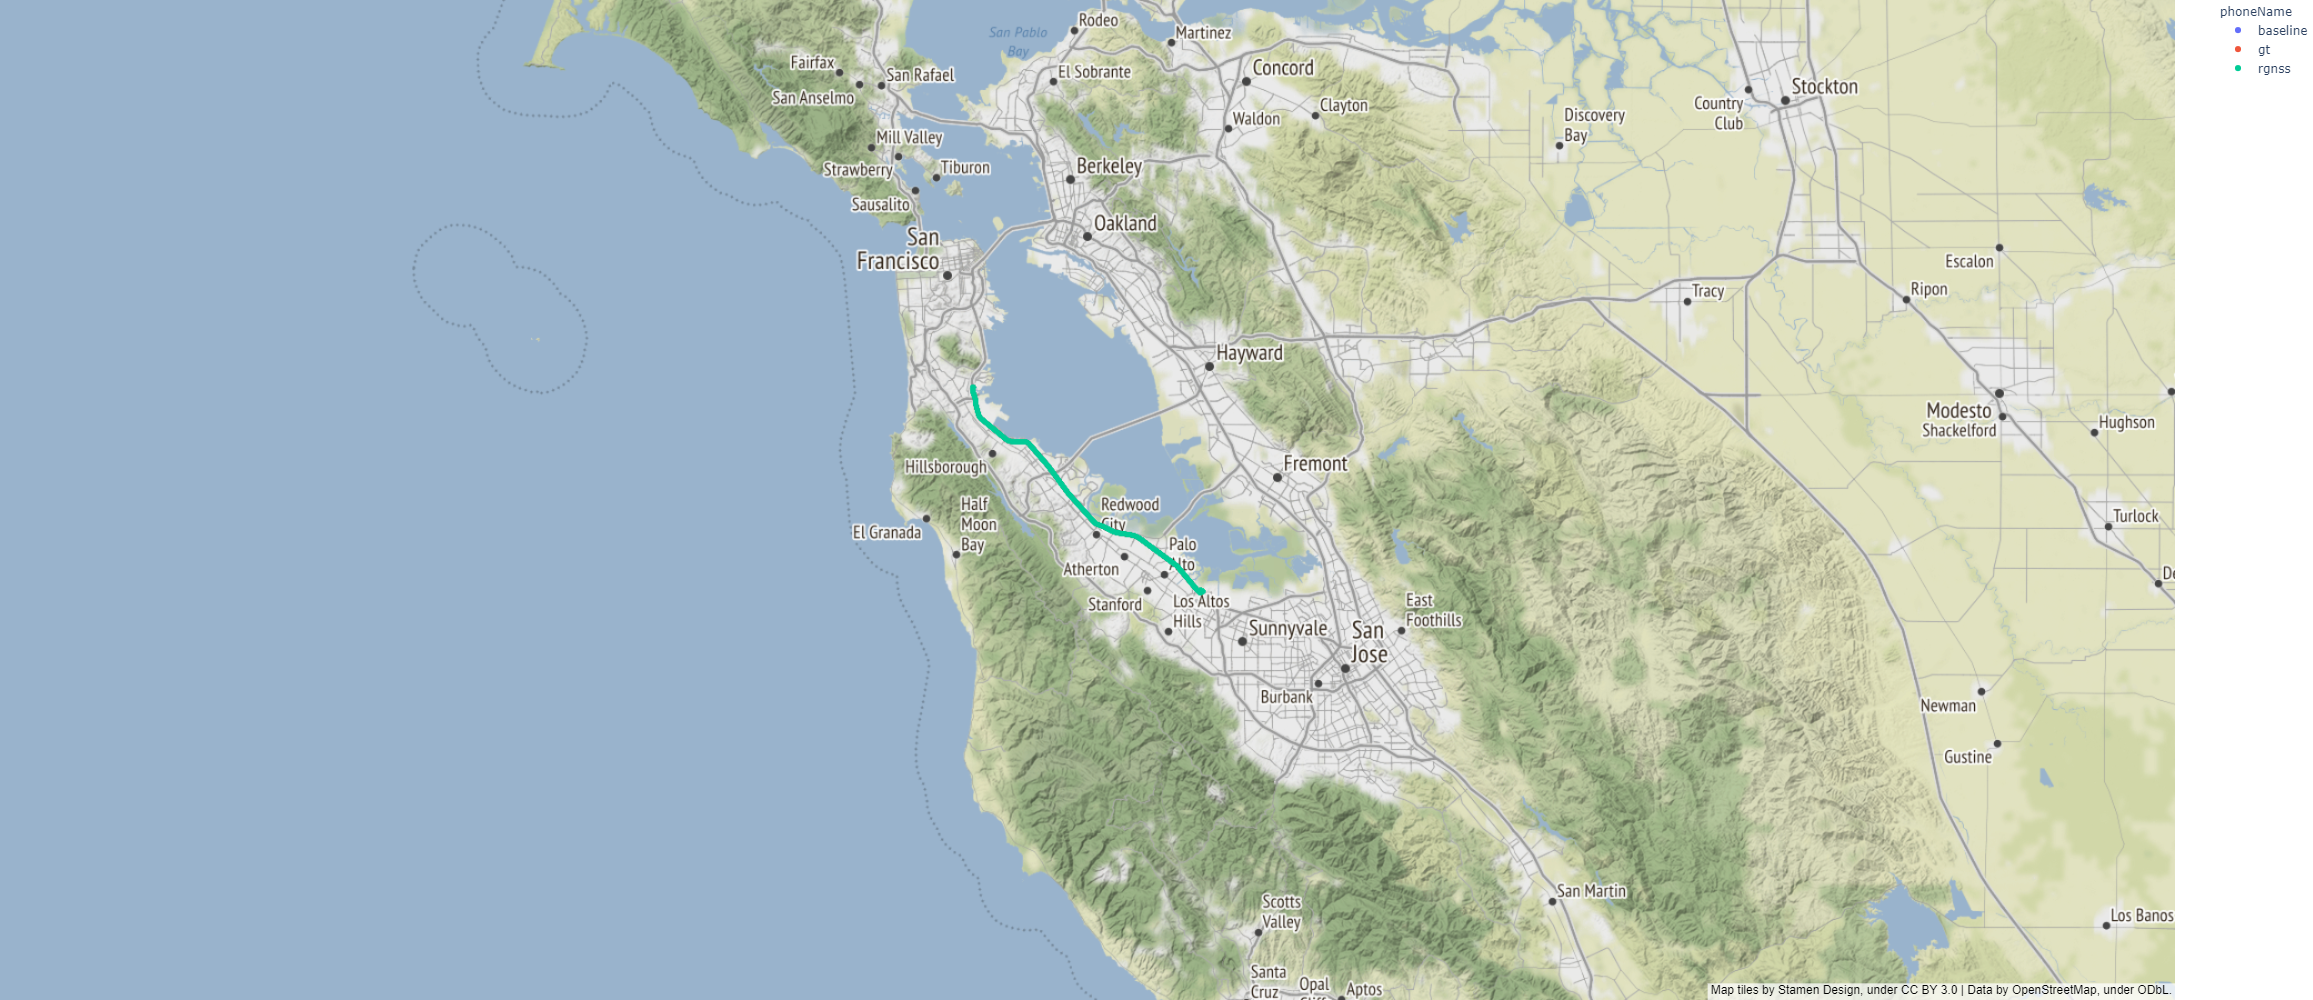

In [85]:
visualize_collection(tmp, '2020-05-14-US-MTV-1')